<a href="https://colab.research.google.com/github/EmeraldMath/Tensorflow_models/blob/master/tf_keras_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

TensorFlow 2.x selected.
2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.5
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


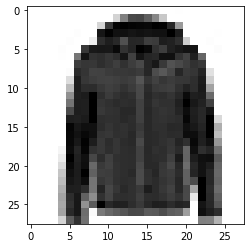

In [0]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

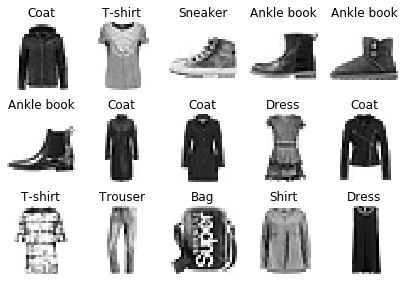

In [0]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap = "binary", interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle book']

show_imgs(3, 5, x_train, y_train, class_names)

In [0]:
# tf.keras.models.Sequential()
'''
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
'''
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: convert vector into prob distribution, x = [x1, x2, x3],
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
 # [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300] Param# = 784*300 = 235500

In [0]:
history = model.fit(x_train, y_train, epochs=10,
          validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 127us/sample - loss: 1.9776 - accuracy: 0.6869 - val_loss: 0.8283 - val_accuracy: 0.7232
Epoch 2/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.7283 - accuracy: 0.7368 - val_loss: 0.6977 - val_accuracy: 0.7452
Epoch 3/10
55000/55000 [==============================] - 7s 122us/sample - loss: 0.6329 - accuracy: 0.7625 - val_loss: 0.5444 - val_accuracy: 0.7988
Epoch 4/10
55000/55000 [==============================] - 7s 121us/sample - loss: 0.5477 - accuracy: 0.7947 - val_loss: 0.4784 - val_accuracy: 0.8330
Epoch 5/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4895 - accuracy: 0.8315 - val_loss: 0.4594 - val_accuracy: 0.8516
Epoch 6/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4535 - accuracy: 0.8441 - val_loss: 0.4415 - val_accuracy: 0.8608
Epoch 7/10
55000/55000 [===========================

In [0]:
type(history)

tensorflow.python.keras.callbacks.History

In [0]:
history.history

{'accuracy': [0.6869091,
  0.7368,
  0.76247275,
  0.7946909,
  0.83147275,
  0.8440727,
  0.8510909,
  0.85974544,
  0.8651818,
  0.86792725],
 'loss': [1.9775706916202198,
  0.7283078253052452,
  0.6329325033144517,
  0.5477488373799757,
  0.48947240148457616,
  0.4535047125166113,
  0.43735559741583735,
  0.40629905848719855,
  0.3891882822730324,
  0.3863047167994759],
 'val_accuracy': [0.7232,
  0.7452,
  0.7988,
  0.833,
  0.8516,
  0.8608,
  0.8638,
  0.8674,
  0.8532,
  0.8386],
 'val_loss': [0.8283098165988922,
  0.6976916264533997,
  0.544392972278595,
  0.47843152136802675,
  0.45940547404289245,
  0.4414947544455528,
  0.414050014936924,
  0.41979505544900897,
  0.4531303419113159,
  0.5315228346347809]}

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

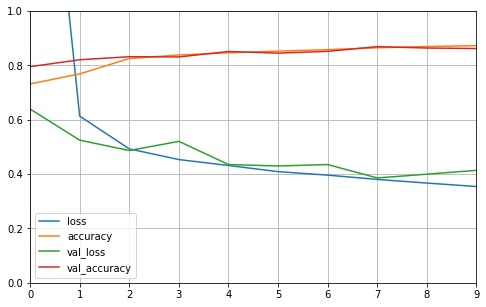

In [0]:

plot_learning_curves(history)

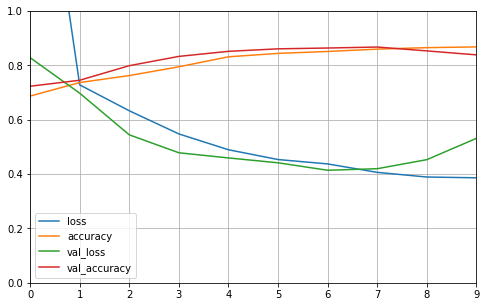

In [0]:
plot_learning_curves(history)